In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir=r"asl/asl"
sign=[]
for file in os.listdir(data_dir):
    sign+=[file]
print(sign)
print(len(sign))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
26


In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 12705 images belonging to 26 classes.
Found 5445 images belonging to 26 classes.


In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(26, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)      

In [12]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

Epoch 1/5


C:\Users\91897\AppData\Local\Temp\ipykernel_18240\1113939686.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)


636/636 [==============================] - 496s 778ms/step - loss: 0.4526 - accuracy: 0.8564 - val_loss: 0.3388 - val_accuracy: 0.8896
Epoch 2/5
636/636 [==============================] - 523s 823ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.2857 - val_accuracy: 0.9260
Epoch 3/5
636/636 [==============================] - 664s 1s/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.2542 - val_accuracy: 0.9150
Epoch 4/5
636/636 [==============================] - 623s 979ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.4491 - val_accuracy: 0.8992
Epoch 5/5
636/636 [==============================] - 580s 913ms/step - loss: 0.0279 - accuracy: 0.9921 - val_loss: 0.1895 - val_accuracy: 0.9431


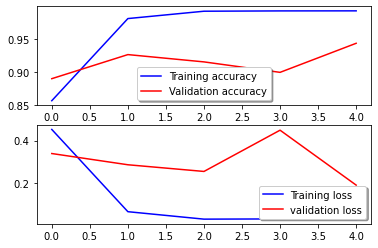

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
model.evaluate(test_generator)
model.save("CNNmodel.h5")

273/273 [==============================] - 45s 166ms/step - loss: 0.1895 - accuracy: 0.9431


In [5]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(26, activation='sigmoid'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [6]:
model2.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist2=model2.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

C:\Users\91897\AppData\Local\Temp\ipykernel_13988\3792425980.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2=model2.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)


Epoch 1/5
636/636 [==============================] - 1663s 3s/step - loss: 0.2447 - accuracy: 0.9503 - val_loss: 0.1899 - val_accuracy: 0.9473
Epoch 2/5
636/636 [==============================] - 1093s 2s/step - loss: 0.0386 - accuracy: 0.9921 - val_loss: 0.2015 - val_accuracy: 0.9416
Epoch 3/5
636/636 [==============================] - 1057s 2s/step - loss: 0.0402 - accuracy: 0.9915 - val_loss: 0.3799 - val_accuracy: 0.8648
Epoch 4/5
636/636 [==============================] - 1012s 2s/step - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.1445 - val_accuracy: 0.9568
Epoch 5/5
636/636 [==============================] - 1010s 2s/step - loss: 0.0215 - accuracy: 0.9948 - val_loss: 0.0855 - val_accuracy: 0.9862


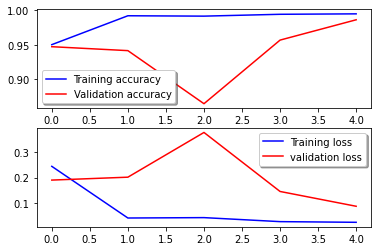

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist2.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist2.history['loss'], color='b', label="Training loss")
ax[1].plot(hist2.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model2.evaluate(test_generator)
model2.save("Mobilenetmodel.h5")

273/273 [==============================] - 83s 305ms/step - loss: 0.0855 - accuracy: 0.9862
